<h2 align="center">SURVEY OF CLIMATE CHANGE</h2>
<br>
<h3 align="center">Pratham Jalan 19BCE1341</h3>
<h3 align="center">Shrushti Singhania 19BCE1566</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

# Plotly
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots

In [2]:
df=pd.read_csv('Data/GlobalTemperatures.csv')
df.tail(10)

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
3182  2015-03-01                   6.740                              0.060   
3183  2015-04-01                   9.313                              0.088   
3184  2015-05-01                  12.312                              0.081   
3185  2015-06-01                  14.505                              0.068   
3186  2015-07-01                  15.051                              0.086   
3187  2015-08-01                  14.755                              0.072   
3188  2015-09-01                  12.999                              0.079   
3189  2015-10-01                  10.801                              0.102   
3190  2015-11-01                   7.433                              0.119   
3191  2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
3182              12.659                          0.096               0.894   
3183              15.224                          0.137               3.402   
3184              18.181                          0.117               6.313   
3185              20.364                          0.133               8.627   
3186              20.904                          0.109               9.326   
3187              20.699                          0.110               9.005   
3188              18.845                          0.088               7.199   
3189              16.450                          0.059               5.232   
3190              12.892                          0.093               2.157   
3191              10.725                          0.154               0.287   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
3182                          0.079                          15.193   
3183                          0.147                          15.962   
3184                          0.153                          16.774   
3185                          0.168                          17.390   
3186                          0.225                          17.611   
3187                          0.170                          17.589   
3188                          0.229                          17.049   
3189                          0.115                          16.290   
3190                          0.106                          15.252   
3191                          0.099                          14.774   

      LandAndOceanAverageTemperatureUncertainty  
3182                                      0.061  
3183                                      0.061  
3184                                      0.058  
3185                                      0.057  
3186                                      0.058  
3187                                      0.057  
3188                                      0.058  
3189                                      0.062  
3190                                      0.063  
3191                                      0.062

### Land and ocean temperature change
1. Reading the data
2. Handling Missing data
3. Create new features (day, month, year etc.)
4. Analysing distribution of data in time to assess how to better analyse the numbers

<AxesSubplot:>

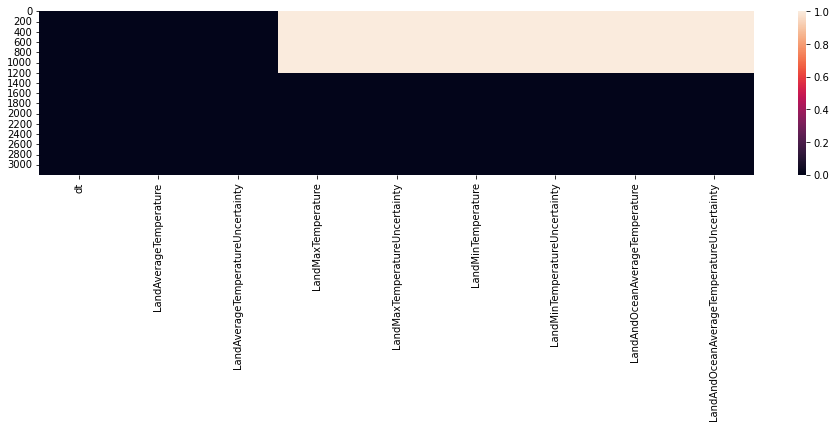

In [3]:
data = pd.read_csv('Data/GlobalTemperatures.csv')

# Make a copy of the data for future graphs
copy = data.copy()

# Missing values
data.isna().sum() # there are 1200 missing values for Max, Min and Land&Ocean Average Temp
plt.figure(figsize = (16, 3))
sns.heatmap(data.isna())

In [4]:
# Missing data with listwise deletion
data.dropna(axis = 0, inplace = True)

# Dealing with the DATE
# converted all dates to the same format

data['Date'] = pd.to_datetime(data.dt) # converted all dates to the same format
data.head(5)

# create a new dataset
data2 = data.copy()
data2.drop(columns = ['dt'], axis = 1, inplace = True)

# Creating new features
data2['day'] = data2['Date'].dt.day
data2['week'] = data2['Date'].dt.week
data2['month'] = data2['Date'].dt.month
data2['year'] = data2['Date'].dt.year
data2.head(5)

 


C:\Users\Dell\AppData\Local\Temp/ipykernel_3936/1955417049.py:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data2['week'] = data2['Date'].dt.week


LandAverageTemperature  LandAverageTemperatureUncertainty  \
1200                   0.749                              1.105   
1201                   3.071                              1.275   
1202                   4.954                              0.955   
1203                   7.217                              0.665   
1204                  10.004                              0.617   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
1200               8.242                          1.738              -3.206   
1201               9.970                          3.007              -2.291   
1202              10.347                          2.401              -1.905   
1203              12.934                          1.004               1.018   
1204              15.655                          2.406               3.811   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
1200                          2.822                          12.833   
1201                          1.623                          13.588   
1202                          1.410                          14.043   
1203                          1.329                          14.667   
1204                          1.347                          15.507   

      LandAndOceanAverageTemperatureUncertainty       Date  day  week  month  \
1200                                      0.367 1850-01-01    1     1      1   
1201                                      0.414 1850-02-01    1     5      2   
1202                                      0.341 1850-03-01    1     9      3   
1203                                      0.267 1850-04-01    1    14      4   
1204                                      0.249 1850-05-01    1    18      5   

      year  
1200  1850  
1201  1850  
1202  1850  
1203  1850  
1204  1850

In [5]:
data2['week'].value_counts()

5     166
9     160
44    160
31    149
22    136
18    125
35    112
48    112
40    102
1      96
13     88
26     88
14     78
27     78
39     64
36     54
49     54
17     41
52     41
23     30
53     29
30     17
45      6
10      6
Name: week, dtype: int64

In [6]:
earth_data = data2.groupby(by = 'year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']].mean().reset_index()

earth_data['turnpoint'] = np.where(earth_data['year'] <= 1975, 'before', 'after') # creating a new columns
earth_data.head(10)

year  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1850                7.900667                           0.876417   
1  1851                8.178583                           0.881917   
2  1852                8.100167                           0.918250   
3  1853                8.041833                           0.835000   
4  1854                8.210500                           0.825667   
5  1855                8.110750                           0.887167   
6  1856                7.995917                           0.760750   
7  1857                7.758167                           0.751083   
8  1858                8.100250                           0.699750   
9  1859                8.252000                           0.674667   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0           13.476667                       2.394833            1.964333   
1           13.081000                       2.397250            2.203917   
2           13.397333                       2.619250            2.337000   
3           13.886583                       2.095083            1.892500   
4           13.977417                       1.783333            1.762167   
5           13.493167                       1.331417            1.702833   
6           13.470250                       1.798250            1.525083   
7           13.437583                       2.179167            1.856833   
8           13.683000                       1.870000            2.110750   
9           13.860333                       1.874750            2.460167   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                       1.571167                       14.867167   
1                       1.632417                       14.991833   
2                       1.382917                       15.006500   
3                       1.355583                       14.955167   
4                       1.357000                       14.991000   
5                       1.655333                       15.021083   
6                       1.778500                       14.879333   
7                       1.591167                       14.758250   
8                       1.224333                       14.881500   
9                       1.143000                       14.929917   

   LandAndOceanAverageTemperatureUncertainty turnpoint  
0                                   0.308167    before  
1                                   0.312083    before  
2                                   0.316417    before  
3                                   0.283833    before  
4                                   0.276417    before  
5                                   0.291167    before  
6                                   0.260167    before  
7                                   0.259750    before  
8                                   0.251833    before  
9                                   0.258250    before

In [7]:
df=df.iloc[:,:2]

In [8]:
earth_data[['LandAverageTemperature', 'LandMaxTemperature', 
       'LandMinTemperature', 'LandAndOceanAverageTemperature']].describe()

LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
count              166.000000          166.000000          166.000000   
mean                 8.571583           14.350601            2.743595   
std                  0.473687            0.447741            0.614124   
min                  7.558583           13.081000            1.525083   
25%                  8.195708           14.055917            2.262562   
50%                  8.540750           14.307708            2.734917   
75%                  8.791250           14.539167            3.126833   
max                  9.831000           15.572667            4.148833   

       LandAndOceanAverageTemperature  
count                      166.000000  
mean                        15.212566  
std                          0.298629  
min                         14.740083  
25%                         14.991208  
50%                         15.144208  
75%                         15.379104  
max                         16.058583

In [9]:
# Creating the dataset - using copy
copy['Date'] = pd.to_datetime(copy.dt)
copy['year'] = copy['Date'].dt.year
land_avg = copy.groupby('year')['LandAverageTemperature', 'LandAverageTemperatureUncertainty'].mean().reset_index()

# Creating the graph
fig = go.Figure()
fig.update_layout(title="Land Average Temperature", title_font_size = 18,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(210,105,30)'))

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperatureUncertainty'], mode = 'lines',
                        name = 'Land Avg Temp Error', marker_color = 'rgb(0,142,0)'))

C:\Users\Dell\AppData\Local\Temp/ipykernel_3936/1797993822.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  land_avg = copy.groupby('year')['LandAverageTemperature', 'LandAverageTemperatureUncertainty'].mean().reset_index()


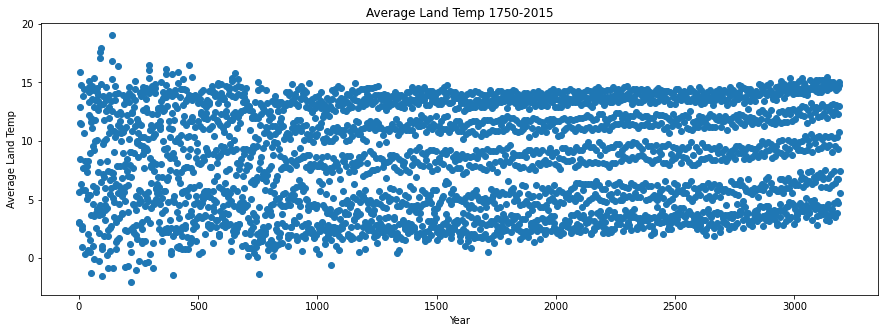

In [10]:
plt.figure(figsize=(15,5))
plt.scatter(x=df['LandAverageTemperature'].index,y=df["LandAverageTemperature"])
plt.title("Average Land Temp 1750-2015")
plt.xlabel("Year")
plt.ylabel("Average Land Temp")
plt.show()

In [11]:
# Figure layout
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="When Global Warming Started?",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

# Figure data
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[7.5, 10], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 1)

fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMinTemperature'], mode = 'lines',
                        name = 'Land Min Temp', marker_color='rgb(210,105,30)'), row = 1, col = 2)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[1.5, 4.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 2)

fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMaxTemperature'], mode = 'lines',
                        name = 'Land Max Temp', marker_color='rgb(135,206,235)'), row = 2, col = 1)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[13, 15.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 2, col = 1)

fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAndOceanAverageTemperature'], mode = 'lines',
                        name = 'Land&Ocean Avg Temp', marker_color='rgb(107,142,35)'), row = 2, col = 2)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[14.5, 16], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 2, col = 2)

In [12]:
# Change in average temperature before/after 1975

# Figure layout
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Average Temperatures before and after 1975",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')

# Figure data
fig.add_trace(go.Box(x = earth_data['LandAverageTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(128, 0, 0)', boxmean = True, name = 'Land Avg Temp'),
             row = 1, col = 1)
fig.add_trace(go.Box(x = earth_data['LandMinTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(210,105,30)', boxmean = True, name = 'Land Min Temp'),
             row = 1, col = 2)
fig.add_trace(go.Box(x = earth_data['LandMaxTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(135,206,235)', boxmean = True, name = 'Land Max Temp'),
             row = 2, col = 1)
fig.add_trace(go.Box(x = earth_data['LandAndOceanAverageTemperature'], y = earth_data['turnpoint'], boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(107,142,35)', boxmean = True, name = 'Land&Ocean Avg Temp'),
             row = 2, col = 2)


fig.update_traces(orientation='h')

In [13]:
from sklearn.linear_model import LinearRegression as LinReg
times=pd.DatetimeIndex(df['dt'])
grouped=df.groupby([times.year]).mean()
x=grouped.index.values.reshape(-1,1)
y=grouped.LandAverageTemperature.values

In [14]:
model=LinReg()
model.fit(x,y)
y_preds=model.predict(x)
print("Accuracy:"+ str(model.score(x,y)))

Accuracy:0.3873026972956113


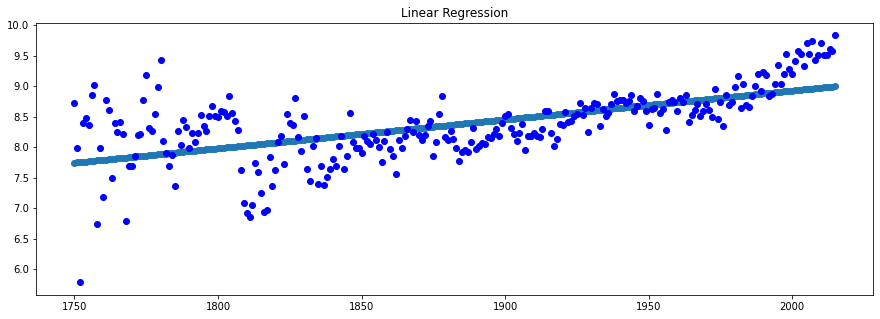

In [15]:
plt.figure(figsize=(15,5))
plt.title('Linear Regression')
plt.scatter(x=x, y=y_preds)
plt.scatter(x=x, y=y, c='b')

####  Part 1 : Focuses on the actual phenomenon of climate change.The effects of climate change can be seen in the increase in global surface temperature, rising sea levels,increasingly frequent extreme weather events and the rapid decline in biodiversity. All the major causes of climate change point to human activities: deforestation, the use of fossil fuels, increase in greenhouse gas emissions, etc. Since climate change is something that almost entirely stems from human activities, it becomes important to increase discussion about the climate and raise awareness amongst people about this issue.

#### Part II: People's attitudes towards climate change. A lot of people believe that the idea of climate change is a hoax or are in denial and this is a real problem. The only way to curb climate change is to get people to change their attitudes and transition to a more sustainable lifestyle. 



In [16]:
# Data extraction libraries
import urllib
from urllib import request
import zipfile
import wget

# Data manipulation libraries
import pandas as pd
import numpy as np
import random

# Statistical libraries
import scipy
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.ndimage.interpolation import shift

# Time series specific libraries
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

# Visualization libraries and configurations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()


In [17]:
survey_data = pd.read_csv('Data/survey_data.csv',encoding="ISO-8859-1")
survey_metadata = pd.read_csv('Data/survey_metadata.csv',encoding="ISO-8859-1")


In [18]:
country_data = pd.read_csv('Data/countypres_2000-2016.tab', sep='\t')
country_data.head(5)

year    state state_po   county    FIPS     office       candidate  \
0  2000  Alabama       AL  Autauga  1001.0  President         Al Gore   
1  2000  Alabama       AL  Autauga  1001.0  President  George W. Bush   
2  2000  Alabama       AL  Autauga  1001.0  President     Ralph Nader   
3  2000  Alabama       AL  Autauga  1001.0  President           Other   
4  2000  Alabama       AL  Baldwin  1003.0  President         Al Gore   

        party  candidatevotes  totalvotes   version  
0    democrat          4942.0       17208  20191203  
1  republican         11993.0       17208  20191203  
2       green           160.0       17208  20191203  
3         NaN           113.0       17208  20191203  
4    democrat         13997.0       56480  20191203

In [19]:
country_data['rep_percent'] = np.nan
# For each row, calculating the 'candidatevotes' as a percentage of 'totalvotes'
country_data['rep_percent'] = np.divide(np.array(country_data['candidatevotes']), np.array(country_data['totalvotes']) )
country_data = country_data[ (country_data['party']=='democrat') | (country_data['party']=='republican') ].reset_index()


In [20]:
state_mappings = pd.DataFrame(country_data, columns = ['state','state_po']).drop_duplicates()

In [21]:
# Obtaining rowwise percentage of republican party votes
republican_percent = list(country_data[country_data['party']=='republican']['rep_percent'])
republican_percent1 = []
# Transforming 'rep_percent' column with republican percentage
for i in republican_percent:
  republican_percent1.extend([i, i])
country_data['rep_percent'] = republican_percent1
country_data.head(4)

index  year    state state_po   county    FIPS     office       candidate  \
0      0  2000  Alabama       AL  Autauga  1001.0  President         Al Gore   
1      1  2000  Alabama       AL  Autauga  1001.0  President  George W. Bush   
2      4  2000  Alabama       AL  Baldwin  1003.0  President         Al Gore   
3      5  2000  Alabama       AL  Baldwin  1003.0  President  George W. Bush   

        party  candidatevotes  totalvotes   version  rep_percent  
0    democrat          4942.0       17208  20191203     0.696943  
1  republican         11993.0       17208  20191203     0.696943  
2    democrat         13997.0       56480  20191203     0.723654  
3  republican         40872.0       56480  20191203     0.723654

In [22]:
# Grouping by year and county, aggregating by maximum candidate votes
country_winners = country_data.groupby(['year','county'], sort = False)['candidatevotes'].max().reset_index()
# Merging with original county data to re-obtain columns
country_winners = pd.merge(country_winners, country_data,  how='left', left_on=['year','county','candidatevotes'], right_on = ['year','county','candidatevotes'])


In [23]:
survey_states = survey_data[survey_data['GeoType']=='State']
survey_data = survey_data[survey_data['GeoType']=='County']
survey_data['GeoName'] = survey_data['GeoName'].apply(lambda a: a.split()[0])
survey_data.head()

GeoType  GEOID  GeoName  TotalPop  discuss  discussOppose  reducetax  \
52  County   1001  Autauga     41829   26.008         73.952     55.775   
53  County   1003  Baldwin    162434   28.183         71.754     55.663   
54  County   1005  Barbour     20346   26.345         73.566     65.585   
55  County   1007     Bibb     17885   24.045         75.854     56.512   
56  County   1009   Blount     44177   24.138         75.765     50.679   

    reducetaxOppose  CO2limits  CO2limitsOppose  ...  devharm  devharmOppose  \
52           42.844     56.867           42.488  ...   54.355         29.051   
53           43.417     55.341           44.298  ...   54.925         30.230   
54           32.573     65.633           33.135  ...   59.994         19.609   
55           42.354     56.225           43.093  ...   52.464         28.991   
56           48.630     51.480           48.133  ...   49.577         34.623   

    futuregen  futuregenOppose  harmplants  harmplantsOppose  timing  \
52     57.917           27.677      58.486            27.972  46.432   
53     59.750           27.537      61.206            26.070  44.702   
54     62.346           18.838      64.491            18.005  55.964   
55     56.048           27.888      57.614            26.950  46.294   
56     53.900           33.078      54.957            32.199  41.477   

    timingOppose  affectweather  affectweatherOppose  
52        53.569         48.884                8.061  
53        55.298         50.362                8.506  
54        44.035         56.914                5.907  
55        53.706         48.185                8.061  
56        58.524         43.141                9.582  

[5 rows x 64 columns]

In [24]:
country_political = country_winners.groupby(['county'], sort = False)['rep_percent'].mean().reset_index()
country_winners_overall = country_winners.groupby(['county'], sort = False)['party'].agg(lambda x: scipy.stats.mode(x)[0][0]).reset_index()

In [25]:
country_info = pd.merge(country_winners_overall, country_political, how='left', on='county')
survey_joined = pd.merge(country_info, survey_data, how='left', left_on = 'county', right_on='GeoName')
survey_joined = survey_joined.dropna()


#### The cell below associates a color with political party. Republican maps to red and Democrat maps to blue.

In [26]:
survey_joined['color'] = survey_joined['party']
survey_joined['color'] = survey_joined['color'].replace({'republican': 'red', 'democrat': 'blue'})

#### To visualize the relationship between the percentage strength of  voters and belief in climate change

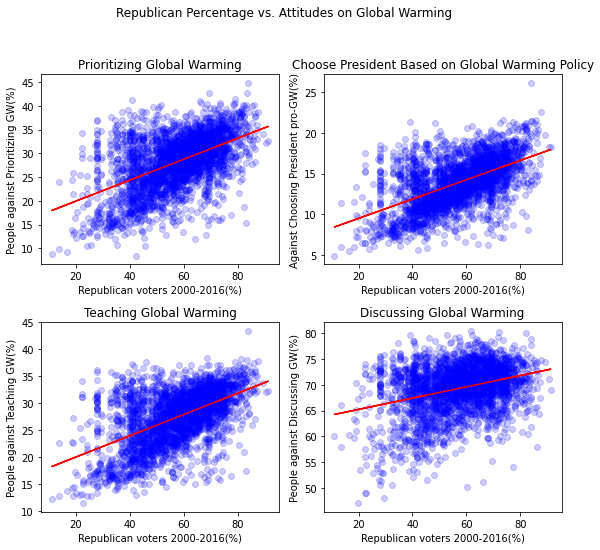

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle("Republican Percentage vs. Attitudes on Global Warming")

axs[0,0].scatter(survey_joined['rep_percent']*100, survey_joined['priorityOppose'], alpha=0.2,
             color = 'blue')
axs[0,0].set_title('Prioritizing Global Warming')
axs[0,0].set_xlabel('Republican voters 2000-2016(%)')
axs[0,0].set_ylabel('People against Prioritizing GW(%)')

m, b = np.polyfit(survey_joined['rep_percent']*100, survey_joined['priorityOppose'], 1)
axs[0,0].plot(survey_joined['rep_percent']*100, m*survey_joined['rep_percent']*100 + b, color='red')

axs[0,1].scatter(survey_joined['rep_percent']*100, survey_joined['presidentOppose'], alpha=0.2,
             color = 'blue')
axs[0,1].set_title('Choose President Based on Global Warming Policy')
axs[0,1].set_xlabel('Republican voters 2000-2016(%)')
axs[0,1].set_ylabel('Against Choosing President pro-GW(%)')
m, b = np.polyfit(survey_joined['rep_percent']*100, survey_joined['presidentOppose'], 1)
axs[0,1].plot(survey_joined['rep_percent']*100, m*survey_joined['rep_percent']*100 + b, color='red')

axs[1,1].scatter(survey_joined['rep_percent']*100, survey_joined['discussOppose'], alpha=0.2,
             color = 'blue')
axs[1,1].set_title('Discussing Global Warming')
axs[1,1].set_xlabel('Republican voters 2000-2016(%)')
axs[1,1].set_ylabel('People against Discussing GW(%)')

m, b = np.polyfit(survey_joined['rep_percent']*100, survey_joined['discussOppose'], 1)
axs[1,1].plot(survey_joined['rep_percent']*100, m*survey_joined['rep_percent']*100 + b, color='red')

axs[1,0].scatter(survey_joined['rep_percent']*100, survey_joined['teachGWOppose'], alpha=0.2,
             color = 'blue')
axs[1,0].set_title('Teaching Global Warming')
axs[1,0].set_xlabel('Republican voters 2000-2016(%)')
axs[1,0].set_ylabel('People against Teaching GW(%)')

m, b = np.polyfit(survey_joined['rep_percent']*100, survey_joined['teachGWOppose'], 1)
axs[1,0].plot(survey_joined['rep_percent']*100, m*survey_joined['rep_percent']*100 + b, color='red')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Data/scatter_rq1.png')

#### As observed by the visualization above, we can see that as the percentage of a county's Republican voters increases, it is likely that a greater percentage of people oppose discussing, and increasing accountability for global warming. The linear effect of a country's population on attitudes towards climate change is monotonically increasing.

In [28]:
np.random.seed(123)
# x1 is a county's Republican population, x2 is the county's Democratic population
x1 = list(survey_joined[survey_joined['party']=='republican']['teachGWOppose'])
x2 = list(survey_joined[survey_joined['party']=='democrat']['teachGWOppose'])
# Performing the z-test and obtaining p-value
ztest, pval = stests.ztest(random.sample(x1, 400), x2=random.sample(x2,400), value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis H0")
else:
    print("fail to reject null hypothesis H0")

2.1546682018208963e-36
reject null hypothesis H0


### Part 2: What are the renewable energy, fossil fuel generation patterns of states that perceive global warming as a big threat versus those states that don't?

In [29]:
energy_data = pd.read_csv('Data/renewable_energy.csv')

In [30]:
# Listing the unique values for energy sources
energy_data['ENERGY SOURCE'].unique()

array(['Total', 'Coal', 'Hydroelectric Conventional', 'Natural Gas',
       'Petroleum', 'Wind', 'Wood and Wood Derived Fuels', 'Nuclear',
       'Other Biomass', 'Other Gases', 'Pumped Storage', 'Geothermal',
       'Other', 'Solar Thermal and Photovoltaic'], dtype=object)

In [31]:
# Creating the encoding for energy dictionary
energy_dict = dict({'Coal':0,'Hydroelectric Conventional':1, 'Natural Gas':0, 'Petroleum': 0, 'Wind': 1, 'Wood and Wood Derived Fuels': 0, 'Total':2, 'Nuclear':0, 'Other Biomass':1, 'Other Gases':0, 'Pumped Storage':1, 'Geothermal':1, 'Other':0,'Solar Thermal and Photovoltaic':1 })
# Assigning each energy source in the dataframe as renewable/non-renewable
energy_renewable = []
for i in energy_data['ENERGY SOURCE']:
  energy_renewable.append(energy_dict[i])
# Assigning curated list to 'RENEWABLE' column
energy_data['RENEWABLE'] = energy_renewable
energy_data.head(3)

Unnamed: 0  YEAR STATE               TYPE OF PRODUCER  \
0           0  1990    AK  Total Electric Power Industry   
1           1  1990    AK  Total Electric Power Industry   
2           2  1990    AK  Total Electric Power Industry   

                ENERGY SOURCE  GENERATION (Megawatthours)  RENEWABLE  
0                       Total                   5599506.0          2  
1                        Coal                    510573.0          0  
2  Hydroelectric Conventional                    974521.0          1

In [32]:

state_data = pd.read_csv('Data/1976-2016-president.tab', sep='\t')
# Getting per state, per year winners
state_data_grouped = state_data.groupby(['year','state','state_po'], sort=True)['candidatevotes'].max().reset_index()
state_data_joined = pd.merge(state_data_grouped, state_data, how = 'left', on=['year','state_po','candidatevotes','state'])
state_data_joined = pd.DataFrame(state_data_joined, columns = ['year','state','state_po', 'candidatevotes','party'])
# Getting overall statewise winners
state_winners = state_data_joined.groupby(['state','state_po'], sort = False)['party'].agg(lambda x: scipy.stats.mode(x)[0][0]).reset_index()
state_winners.head()

state state_po       party
0     Alabama       AL  republican
1      Alaska       AK  republican
2     Arizona       AZ  republican
3    Arkansas       AR  republican
4  California       CA    democrat

In [33]:
# Statewise survey data joined with statewise political winners data
survey_states_joined = pd.merge(survey_states, state_winners, how='left', left_on='GeoName',right_on='state')
# Keeping only 'corporationsOppose' and 'mediaweeklyOppose' columns
survey_states_joined = pd.DataFrame(survey_states_joined, columns = ['GeoName','corporationsOppose','mediaweeklyOppose','state_po','party'])
survey_states_joined.head()

GeoName  corporationsOppose  mediaweeklyOppose state_po       party
0     Alabama              10.574             80.114       AL  republican
1      Alaska               9.489             72.302       AK  republican
2     Arizona               9.946             71.108       AZ  republican
3    Arkansas              10.172             79.094       AR  republican
4  California               9.451             71.169       CA    democrat

In [34]:
energy_data_grouped = energy_data.groupby(['STATE','RENEWABLE'])['GENERATION (Megawatthours)'].sum().reset_index()
energy_data_grouped = energy_data_grouped.drop(index=0)
energy_data_grouped.head()

STATE  RENEWABLE  GENERATION (Megawatthours)
1    AK          0                2.939860e+08
2    AK          1                8.311637e+07
3    AK          2                3.771024e+08
4    AL          0                7.234439e+09
5    AL          1                5.728675e+08

In [35]:
energy_joined = pd.merge(energy_data_grouped, survey_states_joined, how='left', left_on='STATE', right_on='state_po')
energy_joined = energy_joined.drop(columns=['state_po'])
energy_joined.head()

STATE  RENEWABLE  GENERATION (Megawatthours)  GeoName  corporationsOppose  \
0    AK          0                2.939860e+08   Alaska               9.489   
1    AK          1                8.311637e+07   Alaska               9.489   
2    AK          2                3.771024e+08   Alaska               9.489   
3    AL          0                7.234439e+09  Alabama              10.574   
4    AL          1                5.728675e+08  Alabama              10.574   

   mediaweeklyOppose       party  
0             72.302  republican  
1             72.302  republican  
2             72.302  republican  
3             80.114  republican  
4             80.114  republican

In [36]:
# Pivot the energy table to create ease of viewing/percentage calculation
energy_pivoted = pd.pivot_table(energy_joined, values=['GENERATION (Megawatthours)'], index=['STATE'],
                    columns=['RENEWABLE']).reset_index()
energy_joined_new =  energy_joined.drop(columns=['RENEWABLE','GENERATION (Megawatthours)'])

# Join energy data table to survey data table
energy_pivoted = pd.merge(energy_pivoted, energy_joined_new, how='left', on='STATE').drop_duplicates()
energy_pivoted.head(5)

C:\Users\Dell\AppData\Local\Temp/ipykernel_3936/1916134185.py:7: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)



STATE (STATE, )  (GENERATION (Megawatthours), 0)  \
0     AK        AK                     2.939860e+08   
3     AL        AL                     7.234439e+09   
6     AR        AR                     2.909617e+09   
9     AZ        AZ                     5.191419e+09   
12    CA        CA                     8.049208e+09   

    (GENERATION (Megawatthours), 1)  (GENERATION (Megawatthours), 2)  \
0                      8.311637e+07                     3.771024e+08   
3                      5.728675e+08                     7.807307e+09   
6                      1.983274e+08                     3.107944e+09   
9                      5.273277e+08                     5.718747e+09   
12                     3.554929e+09                     1.160414e+10   

       GeoName  corporationsOppose  mediaweeklyOppose       party  
0       Alaska               9.489             72.302  republican  
3      Alabama              10.574             80.114  republican  
6     Arkansas              10.172             79.094  republican  
9      Arizona               9.946             71.108  republican  
12  California               9.451             71.169    democrat

In [37]:
energy_pivoted['Renewable_Percent'] = np.divide(np.array(energy_pivoted[('GENERATION (Megawatthours)', 1)]),np.array(energy_pivoted[('GENERATION (Megawatthours)', 2)]))
energy_pivoted['Nonrenewable_Percent'] = np.divide(np.array(energy_pivoted[('GENERATION (Megawatthours)', 0)]),np.array(energy_pivoted[('GENERATION (Megawatthours)', 2)]))
energy_pivoted = energy_pivoted.dropna()
energy_pivoted.head()

STATE (STATE, )  (GENERATION (Megawatthours), 0)  \
0     AK        AK                     2.939860e+08   
3     AL        AL                     7.234439e+09   
6     AR        AR                     2.909617e+09   
9     AZ        AZ                     5.191419e+09   
12    CA        CA                     8.049208e+09   

    (GENERATION (Megawatthours), 1)  (GENERATION (Megawatthours), 2)  \
0                      8.311637e+07                     3.771024e+08   
3                      5.728675e+08                     7.807307e+09   
6                      1.983274e+08                     3.107944e+09   
9                      5.273277e+08                     5.718747e+09   
12                     3.554929e+09                     1.160414e+10   

       GeoName  corporationsOppose  mediaweeklyOppose       party  \
0       Alaska               9.489             72.302  republican   
3      Alabama              10.574             80.114  republican   
6     Arkansas              10.172             79.094  republican   
9      Arizona               9.946             71.108  republican   
12  California               9.451             71.169    democrat   

    Renewable_Percent  Nonrenewable_Percent  
0            0.220408              0.779592  
3            0.073376              0.926624  
6            0.063813              0.936187  
9            0.092210              0.907790  
12           0.306350              0.693650

In [38]:
print(energy_pivoted['party'].unique())

# Assign political parties to colors for plotting visuals
state_dict = {'republican':'red','democrat':'blue'}

# Assigning colors for all rows in energy_pivoted dataframe
energy_colors = []
for i, row in energy_pivoted.iterrows():
  energy_colors.append(state_dict[row['party']])

['republican' 'democrat']


#### The visualization below represents the relationship between a state's renewable energy practices and their views on climate change and global warming. Specifically, Graph 1 represents a state's opposition to receiving global warming related news in weekly media, as the dependent variable. Graph 2 represents a state's opposition to corporations being liable for their CO2 emissions. Each state is encoded by color based on their political affiliation.

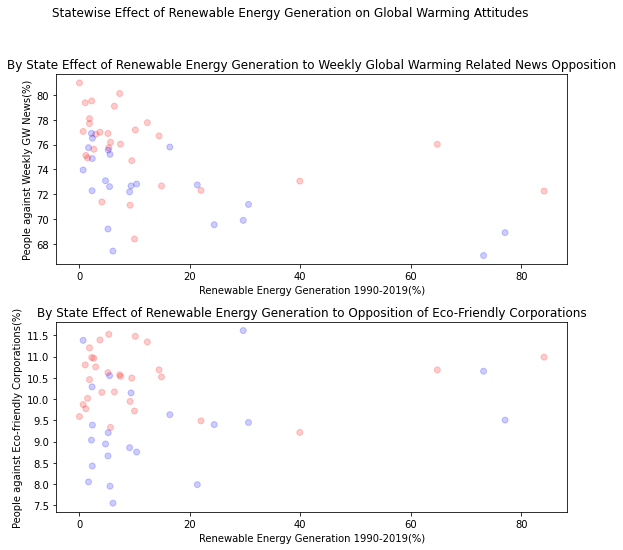

In [39]:
fig, axs = plt.subplots(2, 1, figsize=(8,8))
fig.suptitle("Statewise Effect of Renewable Energy Generation on Global Warming Attitudes")

##### FIGURE 1: OPPOSITION TO WEEKLY GLOBAL WARMING RELATED MEDIA NEWS #####

axs[0].scatter(energy_pivoted['Renewable_Percent']*100, energy_pivoted['mediaweeklyOppose'], alpha=0.2,
             c = energy_colors)
axs[0].set_title('By State Effect of Renewable Energy Generation to Weekly Global Warming Related News Opposition')
axs[0].set_xlabel('Renewable Energy Generation 1990-2019(%)')
axs[0].set_ylabel('People against Weekly GW News(%)')


##### FIGURE 2: PRIORITIZING GLOBAL WARMING #####

axs[1].scatter(energy_pivoted['Renewable_Percent']*100, energy_pivoted['corporationsOppose'], alpha=0.2,
             color = energy_colors)
axs[1].set_title('By State Effect of Renewable Energy Generation to Opposition of Eco-Friendly Corporations')
axs[1].set_xlabel('Renewable Energy Generation 1990-2019(%)')
axs[1].set_ylabel('People against Eco-friendly Corporations(%)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Data/scatter_rq2.1.png')

#### **Observations:**

We observe a downward trend in the graphs, which could indicate that as the amount of renewable energy generation of a state increases, people in the state portray a lower likelihood of opposing eco-friendly practices by corporations and an increased interest in receiving updates about global warming. 

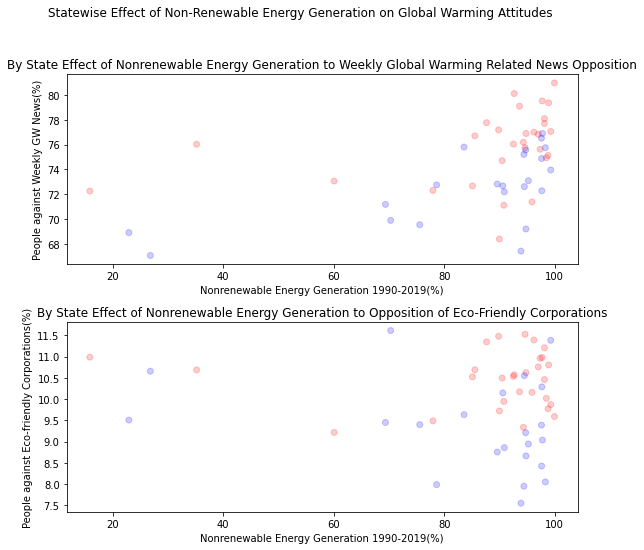

In [40]:
# Creating 2*1 subplots
fig, axs = plt.subplots(2, 1, figsize=(8,8))
fig.suptitle("Statewise Effect of Non-Renewable Energy Generation on Global Warming Attitudes")

##### FIGURE 1: OPPOSITION TO WEEKLY GLOBAL WARMING RELATED MEDIA NEWS #####
# Creating the scatterplot, plot title, axis labels
axs[0].scatter(energy_pivoted['Nonrenewable_Percent']*100, energy_pivoted['mediaweeklyOppose'], alpha=0.2,
             color = energy_colors)
axs[0].set_title('By State Effect of Nonrenewable Energy Generation to Weekly Global Warming Related News Opposition')
axs[0].set_xlabel('Nonrenewable Energy Generation 1990-2019(%)')
axs[0].set_ylabel('People against Weekly GW News(%)')

axs[1].scatter(energy_pivoted['Nonrenewable_Percent']*100, energy_pivoted['corporationsOppose'], alpha=0.2,
             color = energy_colors)
axs[1].set_title('By State Effect of Nonrenewable Energy Generation to Opposition of Eco-Friendly Corporations')
axs[1].set_xlabel('Nonrenewable Energy Generation 1990-2019(%)')
axs[1].set_ylabel('People against Eco-friendly Corporations(%)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Data/scatter_rq2.2.png')

### Do states with higher surface temperatures perceive a greater threat from global warming?

In [41]:
# Load data into 'surface_temp' dataframe
surface_temp = pd.read_csv('Data/GlobalLandTemperaturesByState.csv')
surface_temp.head()

Unnamed: 0  level_0  Unnamed: 0.1   index          dt  AverageTemperature  \
0       13236    13236         60961  302395  1783-01-01              -6.985   
1       69479    69479        122122  525648  1871-03-01              -0.055   
2       54774    54774         67167  317757  1760-05-01              11.465   
3       21946    21946         83774  357861  1943-04-01              11.151   
4       56660    56660         51096  276540  1770-09-01              24.067   

   AverageTemperatureUncertainty          State        Country  
0                          2.948  Massachusetts  United States  
1                          1.437   South Dakota  United States  
2                          4.571      Minnesota  United States  
3                          0.262         Nevada  United States  
4                          3.134      Louisiana  United States

In [42]:
# Dropping null values
surface_temp = surface_temp.dropna()
# Grouping by state and averaging temperature
surface_temp_grouped = surface_temp.groupby('State')['AverageTemperature'].mean().reset_index()
surface_temp_grouped.head()

State  AverageTemperature
0     Alabama           17.240004
1      Alaska           -4.144106
2     Arizona           15.013747
3    Arkansas           15.458368
4  California           13.880647

In [43]:
# Filtering columns from survey data for analysis
survey_states_2 = pd.DataFrame(survey_states, columns=['GeoName','teachGWOppose','gwvoteimpOppose','corporationsOppose'])
# Joining temperature data with survey data 
surface_temp_joined = pd.merge(surface_temp_grouped, survey_states_2, how='left',left_on='State',right_on='GeoName').dropna().drop(columns=['GeoName'])
# Joining temperature data with political affiliation data 
surface_temp_joined = pd.merge(surface_temp_joined, state_winners, how='left', left_on='State', right_on='state').drop(columns=['state'])
surface_temp_joined.head()

State  AverageTemperature  teachGWOppose  gwvoteimpOppose  \
0     Alabama           17.240004         24.470           40.401   
1      Alaska           -4.144106         23.675           32.978   
2     Arizona           15.013747         23.210           32.298   
3    Arkansas           15.458368         23.670           39.904   
4  California           13.880647         18.280           28.134   

   corporationsOppose state_po       party  
0              10.574       AL  republican  
1               9.489       AK  republican  
2               9.946       AZ  republican  
3              10.172       AR  republican  
4               9.451       CA    democrat

In [44]:
# Assigning colors for each state in the visual below
temp_colors = []
for i, row in surface_temp_joined.iterrows():
  temp_colors.append(state_dict[row['party']])

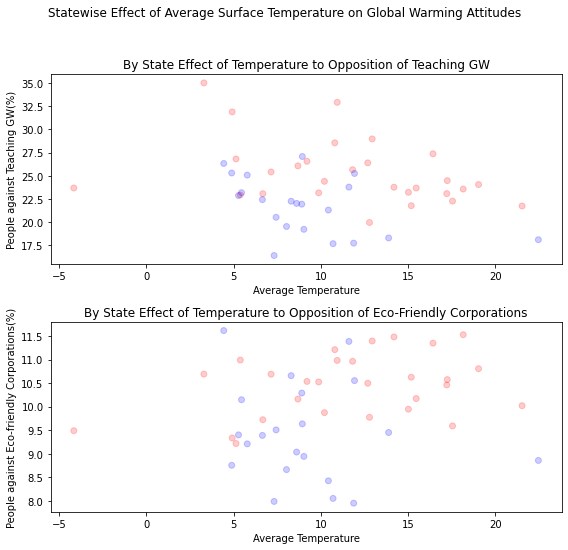

In [45]:
# Creating 2*1 subplots
fig, axs = plt.subplots(2, 1, figsize=(8,8))
fig.suptitle("Statewise Effect of Average Surface Temperature on Global Warming Attitudes")

##### FIGURE 1: OPPOSITION TO WEEKLY GLOBAL WARMING RELATED MEDIA NEWS #####
axs[0].scatter(surface_temp_joined['AverageTemperature'], surface_temp_joined['teachGWOppose'], alpha=0.2,
             c = temp_colors)
axs[0].set_title('By State Effect of Temperature to Opposition of Teaching GW')
axs[0].set_xlabel('Average Temperature')
axs[0].set_ylabel('People against Teaching GW(%)')


##### FIGURE 2: PRIORITIZING GLOBAL WARMING #####
axs[1].scatter(surface_temp_joined['AverageTemperature'], surface_temp_joined['corporationsOppose'], alpha=0.2,
             color = temp_colors)
axs[1].set_title('By State Effect of Temperature to Opposition of Eco-Friendly Corporations')
axs[1].set_xlabel('Average Temperature')
axs[1].set_ylabel('People against Eco-friendly Corporations(%)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Data/scatter_rq3.png')

## What can we project the global surface temperature to be in the next 10 years? 20 years?

In [46]:
# Reading the dataframe and retaining most important columns: 'dt','LandAverageTemperature','LandAverageTemperatureUncertainty'
global_temp = pd.read_csv('Data/GlobalTemperatures.csv')
global_temp = pd.DataFrame(global_temp, columns=['dt','LandAverageTemperature','LandAverageTemperatureUncertainty'])
# Imputing mean into null values
global_temp['LandAverageTemperature'].fillna(np.mean(global_temp['LandAverageTemperature']))
global_temp = global_temp.tail(3072)


In [47]:
# Getting year and month from 'dt' variable
global_temp['year'] = global_temp['dt'].apply(lambda a: a[0:4])
global_temp['month'] = global_temp['dt'].apply(lambda a: a[5:7])
# Averaging "LandAverageTemperature" to get the global annual temperature historical average
global_temp_annual = global_temp.groupby('year')['LandAverageTemperature'].mean().reset_index()
global_temp_annual.head()

year  LandAverageTemperature
0  1760                7.185167
1  1761                8.772500
2  1762                8.606500
3  1763                7.496750
4  1764                8.400333

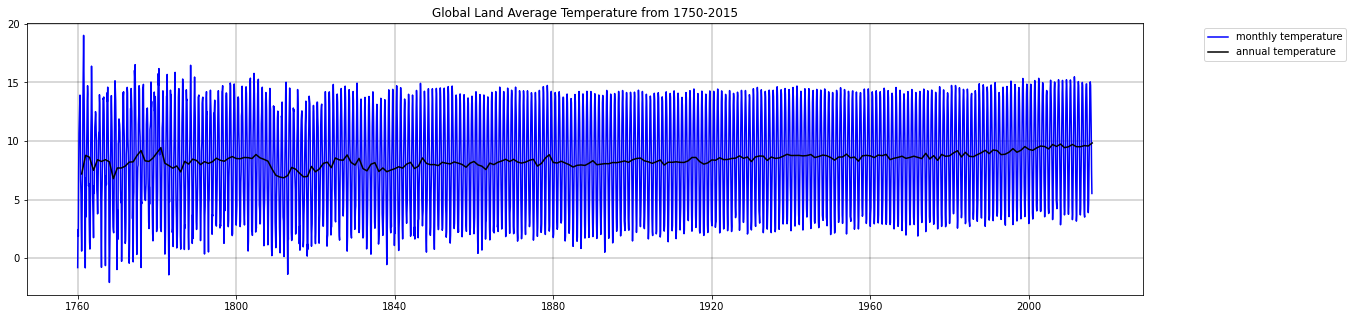

In [48]:
# Definition of date range (x-axis)
dates = pd.date_range(start='1/1/1760', end='12/1/2015', freq='MS')
dates_annual = pd.date_range(start='1/1/1760', end='12/1/2016', freq='A')

# Specifying figure size
plt.figure(figsize=(20,5))   

# Plotting the data
plt.plot(dates, global_temp['LandAverageTemperature'], color = 'blue')
plt.plot(dates_annual, global_temp_annual['LandAverageTemperature'], color = 'black')

# Plotting legend
labels = ['monthly temperature','annual temperature']
plt.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left')

# Grid, title and limit specifications
plt.grid(color='black', linestyle='-', linewidth=0.3)    # plotting grid background
plt.title('Global Land Average Temperature from 1750-2015')   # specifying plot title

plt.savefig('Data/timeseries_rq4.png')
plt.show()

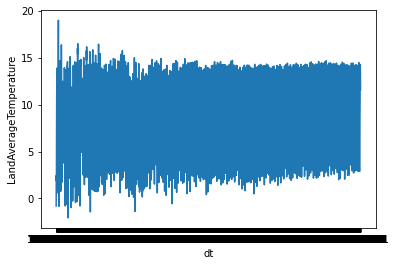

In [49]:
# Lineplot diagram
#The cells create a line plot, boxplot for the Land Average Temperature to observe the evolution of temperature as
#well as the mean, quartiles and outliers of temperatures on a monthly frequency.
train_temp = global_temp.head(int(0.8*len(global_temp)))
sns.lineplot(x="dt", y="LandAverageTemperature",legend = 'full' , data=train_temp)
plt.savefig('Data/lineplot_rq4.png')

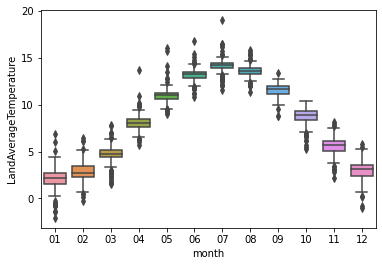

In [50]:
# Boxplot diagram
sns.boxplot(x="month", y="LandAverageTemperature", data=train_temp)
plt.savefig('Data/boxplot_rq4.png')

In [51]:
train_temp = train_temp.set_index('dt')
train_temp.head()

LandAverageTemperature  LandAverageTemperatureUncertainty  year  \
dt                                                                            
1760-01-01                  -0.811                              4.567  1760   
1760-02-01                   2.436                              3.535  1760   
1760-03-01                   1.864                              4.666  1760   
1760-04-01                   7.436                              2.669  1760   
1760-05-01                  10.661                              1.857  1760   

           month  
dt                
1760-01-01    01  
1760-02-01    02  
1760-03-01    03  
1760-04-01    04  
1760-05-01    05

#### The cell below creates a seasonal decomposition plot for Land average temperature for a monthly frequency. It graphs the 'Observed' time series, Trend in the time series (left after accounting for seasonality), Seasonality, and the Residuals or remaining noise after subtracting trend and seasonality from the time series. The graphs are represented as additive models to obtain the final time series.

In [52]:
# Function definition for testing time series stationarity
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    plt.savefig('Data/stationarity_rq4.png')
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

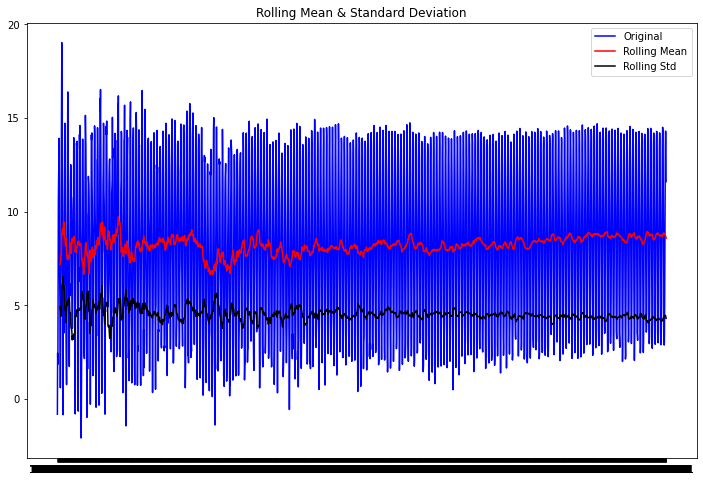

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.569782e+00
p-value                        7.989691e-09
#Lags Used                     2.000000e+01
Number of Observations Used    2.436000e+03
Critical Value (1%)           -3.433037e+00
Critical Value (5%)           -2.862727e+00
Critical Value (10%)          -2.567402e+00
dtype: float64


<Figure size 432x288 with 0 Axes>

In [53]:
test_stationarity(train_temp['LandAverageTemperature'])

#### As we can see, the results of the Dickey-Fuller test indicate that the time series is likely stationary. This allows us to proceed with an ARIMA model without performing any transformation on the values of the time series.

#### The cell below plots the autocorrelation and partial autocorrelation plots. This allows us to analyse the potential parameters for (p,d,q) in ARIMA.

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



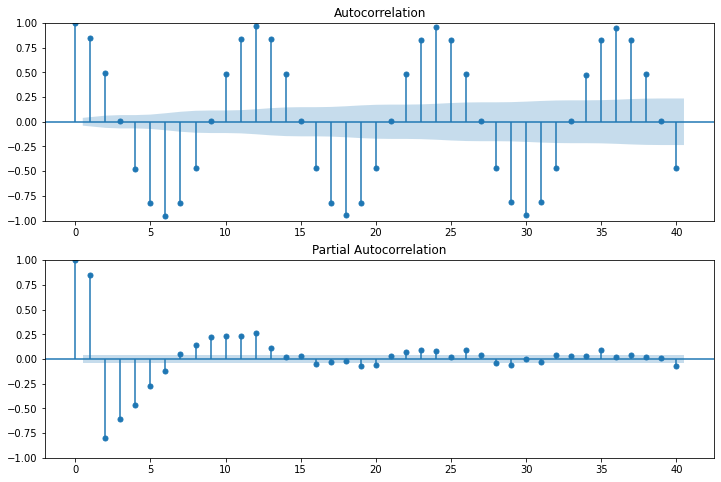

In [54]:
# Plotting the ACF (autocorrelation) and PACF (partial autocorrelation)
#The AR (autoregressive) portion of the ARIMA model correlates with the partial autocorrelation lags.
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_temp['LandAverageTemperature'], lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_temp['LandAverageTemperature'], lags=40, ax=ax2)# , lags=40
plt.savefig('Data/acfs_rq4.png')

#### **ARIMA Model:**

The AR (autoregressive) portion of the ARIMA model correlates with the partial autocorrelation lags. We can see that up until 1 lag, there is significant peak. We can also observe a milder peak in the 13th lag. This suggests an autoregressive process of order 12. 

In [55]:
# Set global temperature index as 'date'
global_temp = global_temp.set_index('dt')
# Split into train and test
train = global_temp.loc['1760-01-01':'2010-01-01']
test = global_temp.loc['2010-01-01':]

In [56]:
model = auto_arima(train['LandAverageTemperature'], start_p=1, start_q=1,
                           max_p=1, max_q=1, m=12, seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=7.33 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=13719.769, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=11518.915, Time=1.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=13717.770, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=12450.961, Time=0.30 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=6.27 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=10733.720, Time=4.38 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=15.20 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=10852.999, Time=2.93 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=10608.561, Time=4.23 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=11184.667, Time=1.27 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=25.19 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=10639.611, Time=2.98 sec
 ARIMA(1,1,1)(0,0,2)[12]         

In [57]:
# Fitting the arima model to train data
model.fit(train['LandAverageTemperature'])
# Predicting temperature for the next 6 years (72 periods)
future_forecast = model.predict(n_periods=72)
future_forecast = shift(future_forecast, 1, cval=np.NaN)

In [58]:
# Assigning the forecasted values to the 'forecast' column
test['forecast'] = future_forecast
test.head()

C:\Users\Dell\AppData\Local\Temp/ipykernel_3936/3747666077.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



LandAverageTemperature  LandAverageTemperatureUncertainty  year  \
dt                                                                            
2010-01-01                   3.737                              0.079  2010   
2010-02-01                   4.399                              0.080  2010   
2010-03-01                   6.738                              0.057  2010   
2010-04-01                   9.671                              0.087  2010   
2010-05-01                  12.406                              0.078  2010   

           month  forecast  
dt                          
2010-01-01    01       NaN  
2010-02-01    02  4.115570  
2010-03-01    03  5.217256  
2010-04-01    04  6.529455  
2010-05-01    05  7.865416

#### The following cell plots the forecasted values against the actual values for surface temperature for the years 2010-2015. The forecasted values are in the dashed blue line and the actual values are in the solid green line.

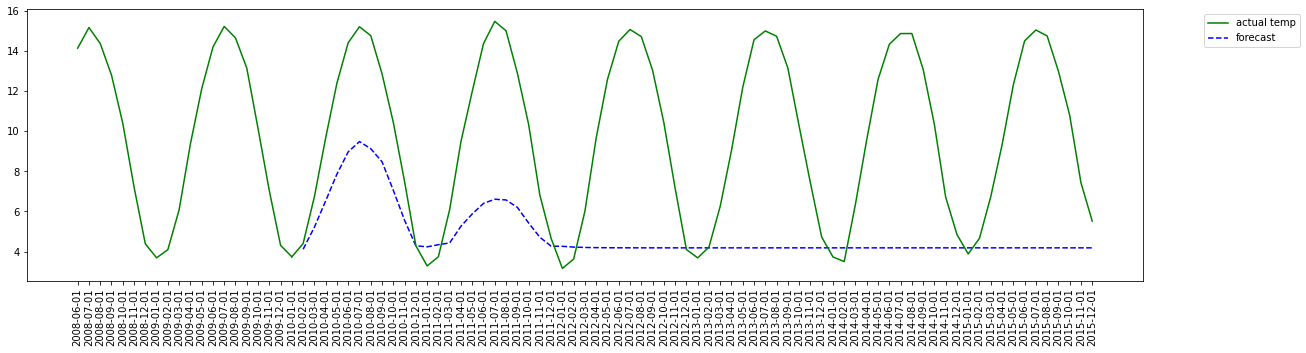

In [59]:
# List of labels in legend
labels = ['actual temp', 'forecast']

# Specifying figure size
plt.figure(figsize=(20,5))   

# Plotting the data
# Plotting the last 20 points in training data in GREEN
plt.plot(train.tail(20).index, train.tail(20)['LandAverageTemperature'], color='green')
# Plotting temperature forecasts in BLUE
plt.plot(test.index, test['forecast'], color = 'blue', linestyle = 'dashed')
# Plotting actual test temperatures in GREEN
plt.plot(test.index, test['LandAverageTemperature'], color = 'green')

# Plotting legend
plt.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation ='vertical')

plt.savefig('Data/forecast_1_rq4.png')
plt.show()

In [60]:
model.fit(global_temp['LandAverageTemperature'])

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [61]:
# Predicting using the model trained above
forecasts2040 = model.predict(n_periods=300)
forecasts2040 = shift(forecasts2040, 1, cval=3.8)
forecasts2040 = list(forecasts2040)

In [62]:
# Creating date ranges from 2015 to 2040
dates_forecast = pd.date_range(start='1/1/2015', end='1/01/2040', freq='M')
forecast_df = pd.DataFrame()
# Assigning dates, forecast and year for the forecast dataframe
forecast_df['date'] = dates_forecast
forecast_df['forecast'] = forecasts2040
forecast_df['year'] = forecast_df['date'].apply(lambda a: int(str(a)[0:4]))
forecast_df = forecast_df.tail(288)
# Aggregating the annual average forecast: group by year and average
forecast_df_annual_grouped = forecast_df.groupby('year')['forecast'].mean().reset_index()
forecast_df_annual_grouped = forecast_df_annual_grouped.rename(columns = {'forecast':'annual'})
forecast_df = pd.merge(forecast_df, forecast_df_annual_grouped, how='left',on='year' )
forecast_df.head()

date  forecast  year    annual
0 2016-01-31  4.671793  2016  5.293754
1 2016-02-29  4.105013  2016  5.293754
2 2016-03-31  4.355933  2016  5.293754
3 2016-04-30  4.599916  2016  5.293754
4 2016-05-31  5.089337  2016  5.293754

In [63]:
# Creating the range of dates to graph
total_daterange = pd.date_range(start='01/01/2010', end = '01/01/2040', freq='M')
final_forecast_df = pd.DataFrame()
# Creating the variables that will be assigned to the surface temperature (actual_wnan), forecast (forecasts2040_wnan), annual forecast (annual_wnan)
forecasts2040_wnan = [np.NaN]*(len(test)-12) + forecasts2040
actual_wnan = list(test['LandAverageTemperature'][:-11]) + [np.NaN] * (len(forecasts2040)-1)
annual_wnan = [np.NaN]*(len(test)) + list(forecast_df['annual'])
# Assigning variables to the date, temperature, forecast, annual columns
final_forecast_df['date'] = total_daterange
final_forecast_df['temperature'] = actual_wnan
final_forecast_df['forecast'] = forecasts2040_wnan
final_forecast_df['annual'] = annual_wnan
final_forecast_df.head()

date  temperature  forecast  annual
0 2010-01-31        3.737       NaN     NaN
1 2010-02-28        4.399       NaN     NaN
2 2010-03-31        6.738       NaN     NaN
3 2010-04-30        9.671       NaN     NaN
4 2010-05-31       12.406       NaN     NaN

#### The following cell graphs the actual temperature until the year 2015. Then, it graphs the monthly average surface temperature forecast from 2015 to 2040, as well as the yearly average surface temperature forecast from 2015 to 2040. The temperature until 2015 is graphed as the color green and the forecast until 2040 is graphed as the dashed blue line.

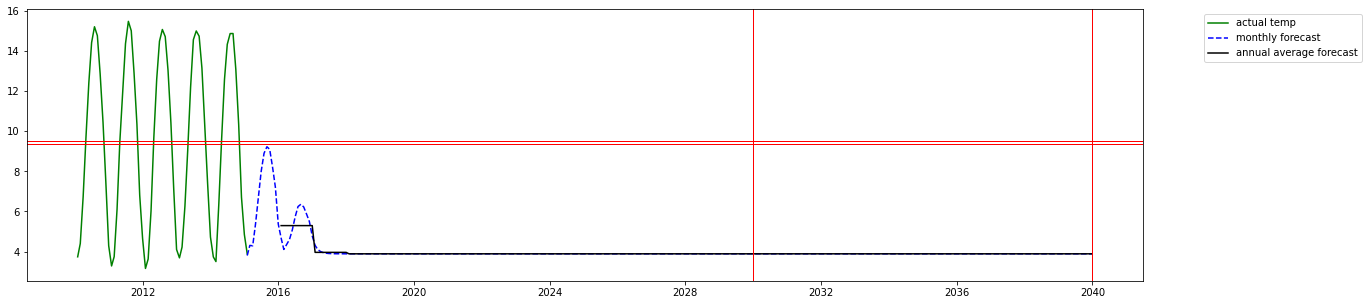

In [64]:
# List of labels in legend
labels = ['actual temp', 'monthly forecast', 'annual average forecast']

# Specifying figure size
plt.figure(figsize=(20,5))   

# Plotting the data
# Plotting actual test temperatures in GREEN
plt.plot(final_forecast_df.date, final_forecast_df['temperature'], color = 'green')

# Plotting the forecast in BLUE
plt.plot(final_forecast_df.date, final_forecast_df.forecast, color = 'blue', linestyle='dashed')

# Plotting the average annual forecast in BLACK
plt.plot(final_forecast_df.date, final_forecast_df.annual, color = 'black')

# Plotting red lines at the dates 01/01/2040 and 01/01/2030 to predict global temperatures in 2030 and 2040
plt.axvline(x=pd.to_datetime('01/01/2040'), linewidth=1, color='r')
plt.axvline(x=pd.to_datetime('01/01/2030'), linewidth=1, color='r')

# Plotting red line at temperature of 9.371 to benchmark temperature increase
plt.axhline(y=9.371, linewidth=1, color='r')
# Plotting line to gauge temperature prediction
plt.axhline(y=9.5, linewidth=1, color='r')

# Plotting legend
plt.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.xticks(rotation ='vertical')

plt.savefig('Data/forecast_2_rq4.png')
plt.show()

#### **Observations:**

The graph above shows in green the already available global average surface temperatures until the year 2015. Then, in the dashed blue line, it shows the global surface temperature predictions until the year 2040. In order to predict the annual average surface temperatures, I averaged the monthly predictions and plotted them with the black dashed line. 

In [65]:
# Predicting for 150 years using the model trained above
forecasts1800 = model.predict(n_periods=1800)
forecasts1800 = shift(forecasts1800, 1, cval=3.8)
forecasts1800 = list(forecasts1800)

In [66]:
# Creating date ranges from 2015 to 2040
dates_forecast_150 = pd.date_range(start='1/1/2015', end='1/01/2165', freq='M')
forecast_df_150 = pd.DataFrame()
# Assigning dates, forecast and year for the forecast dataframe
forecast_df_150['date'] = dates_forecast_150
forecast_df_150['forecast'] = forecasts1800
forecast_df_150['year'] = forecast_df_150['date'].apply(lambda a: int(str(a)[0:4]))
#forecast_df = forecast_df.tail(288)
# Aggregating the annual average forecast: group by year and average
forecast_df_annual_grouped_150 = forecast_df_150.groupby('year')['forecast'].mean().reset_index()
forecast_df_annual_grouped_150 = forecast_df_annual_grouped_150.rename(columns = {'forecast':'annual'})
forecast_df_150 = pd.merge(forecast_df_150, forecast_df_annual_grouped_150, how='left',on='year' )
forecast_df_150.head()

date  forecast  year    annual
0 2015-01-31  3.800000  2015  6.704263
1 2015-02-28  4.305946  2015  6.704263
2 2015-03-31  4.286852  2015  6.704263
3 2015-04-30  5.365144  2015  6.704263
4 2015-05-31  6.677761  2015  6.704263

In [67]:
# Creating the range of dates to graph
total_daterange_150 = pd.date_range(start='01/01/2010', end = '01/01/2165', freq='M')
final_forecast_df_150 = pd.DataFrame()
# Creating the variables that will be assigned to the surface temperature (actual_wnan), forecast (forecasts2040_wnan), annual forecast (annual_wnan)
forecasts2040_wnan_150 = [np.NaN]*(len(test)-12) + forecasts1800
actual_wnan_150 = list(test['LandAverageTemperature'][:-11]) + [np.NaN] * (len(forecasts1800)-1)
annual_wnan_150 = [np.NaN]*(len(test)-12) + list(forecast_df_150['annual'])
# Assigning variables to the date, temperature, forecast, annual columns
final_forecast_df_150['date'] = total_daterange_150
final_forecast_df_150['temperature'] = actual_wnan_150
final_forecast_df_150['forecast'] = forecasts2040_wnan_150
final_forecast_df_150['annual'] = annual_wnan_150
final_forecast_df_150.head()

date  temperature  forecast  annual
0 2010-01-31        3.737       NaN     NaN
1 2010-02-28        4.399       NaN     NaN
2 2010-03-31        6.738       NaN     NaN
3 2010-04-30        9.671       NaN     NaN
4 2010-05-31       12.406       NaN     NaN

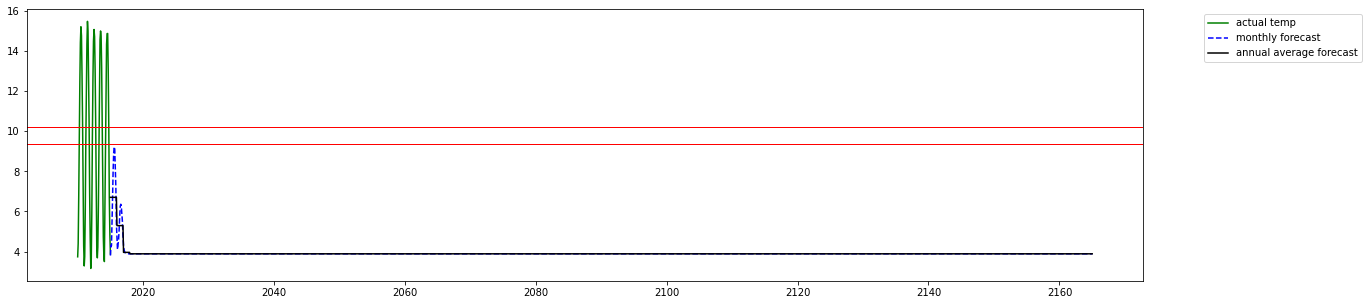

In [68]:
# List of labels in legend
labels = ['actual temp', 'monthly forecast', 'annual average forecast']

# Specifying figure size
plt.figure(figsize=(20,5))   

# Plotting the data
# Plotting actual test temperatures in GREEN
plt.plot(final_forecast_df.date, final_forecast_df['temperature'], color = 'green')

# Plotting the forecast in BLUE
plt.plot(final_forecast_df_150.date, final_forecast_df_150.forecast, color = 'blue', linestyle='dashed')

# Plotting the average annual forecast in BLACK
plt.plot(final_forecast_df_150.date, final_forecast_df_150.annual, color = 'black')

# Plotting red lines at the dates 01/01/2040 and 01/01/2030 to predict global temperatures in 2030 and 2040
#plt.axvline(x=pd.to_datetime('01/01/2040'), linewidth=1, color='r')
#plt.axvline(x=pd.to_datetime('01/01/2030'), linewidth=1, color='r')

# Plotting red line at temperature of 9.371 to benchmark temperature increase
plt.axhline(y=9.371, linewidth=1, color='r')
# Plotting line to gauge temperature prediction
plt.axhline(y=10.2, linewidth=1, color='r')

# Plotting legend
plt.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.xticks(rotation ='vertical')

plt.savefig('Data/forecast_3_rq4.png')
plt.show()

In [69]:
# Filtering, merging energy data with surface temperature data
energy_pivoted_new = pd.DataFrame(energy_pivoted, columns = ['STATE', 'GeoName', 'Renewable_Percent', 'Nonrenewable_Percent'])
state_energy_data = pd.merge(surface_temp_grouped, energy_pivoted_new, how='left', left_on='State', right_on='GeoName').dropna()
state_energy_data.head()

State  AverageTemperature STATE     GeoName  Renewable_Percent  \
0     Alabama           17.240004    AL     Alabama           0.073376   
1      Alaska           -4.144106    AK      Alaska           0.220408   
2     Arizona           15.013747    AZ     Arizona           0.092210   
3    Arkansas           15.458368    AR    Arkansas           0.063813   
4  California           13.880647    CA  California           0.306350   

   Nonrenewable_Percent  
0              0.926624  
1              0.779592  
2              0.907790  
3              0.936187  
4              0.693650

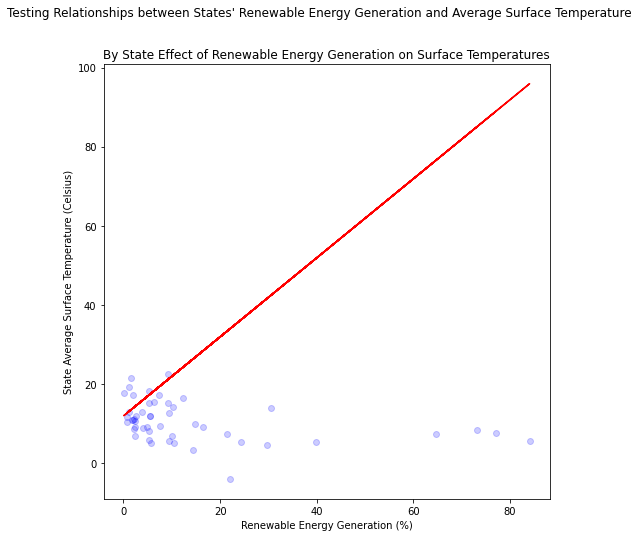

In [70]:
# Plotting 1 subplot
fig, axs = plt.subplots(1, 1, figsize=(8,8))
fig.suptitle("Testing Relationships between States' Renewable Energy Generation and Average Surface Temperature")

##### FIGURE 1: OPPOSITION TO WEEKLY GLOBAL WARMING RELATED MEDIA NEWS #####
axs.scatter(state_energy_data['Renewable_Percent']*100, state_energy_data['AverageTemperature'], alpha=0.2,
             c = 'blue')
axs.set_title('By State Effect of Renewable Energy Generation on Surface Temperatures')
axs.set_xlabel('Renewable Energy Generation (%)')
axs.set_ylabel('State Average Surface Temperature (Celsius)')
m, b = np.polyfit(state_energy_data['Renewable_Percent']*100, state_energy_data['AverageTemperature'], 1)
axs.plot(state_energy_data['Renewable_Percent']*100, state_energy_data['Renewable_Percent']*100 + b, color='red')

plt.savefig('Data/scatter_rq5.png')

### **Observations:**

The blue dots in the graph seem to portray a decreasing relationship between renewable energy generation and state average surface temperatures. But, the line of best fit increases instead of decreasing as the individual blue points would suggest. Any relationship is not exactly strongly visible. For our purposes, this graph does not necessarily lead to any conclusive evidence supporting or rejecting our hypothesis. Thus, we cannot make any strong conclusions.